# Problema 2 - Conhecendo as flores Iris

* Novas Tendências -- Machine Learning
* Projeto Hefesto
* Facilitadora: Elloá B. Guedes 
* Repositório: http://github.com/elloa/hefesto

### Bibliotecas

A célula a seguir está reservada para importação de bibliotecas

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree

### Preparando os dados para treinamento

1. Abra o dataset, visualize o cabeçalho
2. Atribua a uma variável Y o atributo preditor 'species'
3. Armazene os demais atributos em uma variável X
4. Efetue uma partição do tipo Holdout 60/40

In [2]:
df = pd.read_csv("iris.csv",sep=",")
df.head()

sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa

In [3]:
Y = df['species']
df.drop(['species'],axis=1,inplace=True)
X = df

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)

### Treinando Modelos - Árvore de Decisão

1. Instancie uma árvore de decisão com parâmetros padrões
2. Treine e árvore de decisão
3. Se o pacote graphviz estiver disponível, exporte a árvore de decisão produzida e visualize-a

In [8]:
# Adicionar no cabeçalho: from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [9]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
# Pacote graphviz para visualização da árvore de decisão produzida.
# Saída disponível no arquivo iris-tree.pdf
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["sepalLength","sepalWidth","petalLength","petalWidth"],  
                         class_names=["setosa","versicolor","virginica"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris-tree") 

'iris-tree.pdf'

### Testando Modelos - Árvore de Decisão

1. Obtenha as previsões desta árvore para o conjunto de testes
2. Calcule a acurácia deste modelo
   2.1 Da biblioteca sklearn.metrics efetue a importação do accuracy_score
3. Obtenha a matriz de confusão destas previsões
   3.1 Da biblioteca sklearn.metrics fetue a importação do confusion_matrix
4. Obtenha uma visualização mais agradável desta matriz de confusão. 
   4.1 Visualize o arquivo iris-confusao.pdf

In [11]:
previsoes = clf.predict(X_test)

In [13]:
acuracia = accuracy_score(Y_test,previsoes)
acuracia

0.9833333333333333

In [15]:
matrizcf = confusion_matrix(Y_test,previsoes)
matrizcf

array([[23,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 20]])

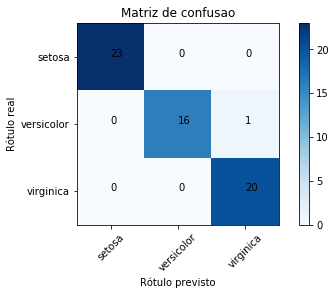

In [16]:
# Plotando matriz de confusão
# a matriz de confusão deve estar numa variável matrizcf
import matplotlib.pyplot as plt
import itertools

cm = matrizcf
cmap=plt.cm.Blues
normalize = False
classes =  ["setosa","versicolor","virginica"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Matriz de confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
plt.savefig("iris-confusao.pdf")
plt.show()


### Comparando Modelos - k-Vizinhos Mais Próximos

1. Treine um classificador k-Vizinhos Mais Próximos para este problema, com vizinhança de 3
2. Obtenha a acurácia deste modelo para o conjunto de testes
3. Considerando esta métrica, qual modelo tem melhor desempenho nesta tarefa?

In [26]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train,Y_train)
previsoeskNN = kNN.predict(X_test)

In [27]:
acuraciaKNN = accuracy_score(previsoeskNN,Y_test)
acuraciaKNN

0.9833333333333333